In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

from datetime import datetime

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error,median_absolute_error
import time
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Función

In [14]:
def LSTMJD(datos,nodos1,nodos2,activacion1,activacion2,epocas,batch,window_size,paciencia,t_pridiccion):


    estandarizacion = MinMaxScaler().fit(datos)
    scaled_data = estandarizacion.transform(datos)

    # window_size = 168
    # t_pridiccion = 24


    # dividir en train, test
    X, y = [], []
    Xf,yf = [],[]

    for i in range(len(scaled_data) - window_size - t_pridiccion):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size:i+window_size+t_pridiccion])

        # Xf.append(fechas[i:i+window_size])
        # yf.append(fechas[i+window_size:i+window_size+t_pridiccion])

    X, y = np.array(X), np.array(y)
    Xf,yf = np.array(Xf),np.array(yf)




    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
    # fecha_X_train, fecha_X_test, fecha_y_train, fecha_y_test = train_test_split(Xf, yf, test_size=0.1, shuffle=False)


        
    model = Sequential()

    model.add(LSTM(nodos1,activation= activacion1, input_shape=(window_size,1)))
    model.add(Dense(nodos2, activation=activacion2))
    model.add(Dense(t_pridiccion , activation="linear"))

    model.compile(optimizer="Adam", loss='mse')

    early_stopping = EarlyStopping(monitor='loss', patience=paciencia, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=epocas,validation_split = 0.2, verbose=1, batch_size=batch,shuffle = False, callbacks=[early_stopping])



    # guardar los archivo a usar en la carpeta 
    rutaAGuardar = f'Modelo {nodos1} - nodos1 - {nodos2} - nodos2 - {epocas} Epocas.keras'
    model.save(rutaAGuardar)




    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoca')
    plt.ylabel('Error')
    plt.legend()



    y_hat = model.predict(X_test, verbose=1)
    y_hat = estandarizacion.inverse_transform(y_hat)


    y_test1 = y_test.reshape(-1, 1)
    y_test1 = estandarizacion.inverse_transform(y_test1)
    y_test1 = y_test1.reshape(-1,24,1)


    return y_test1,y_hat


# Modelo

## AR1

In [3]:
# Abrir datos
dfAR1 = pd.read_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\AR1_09_DATOS.xlsx")

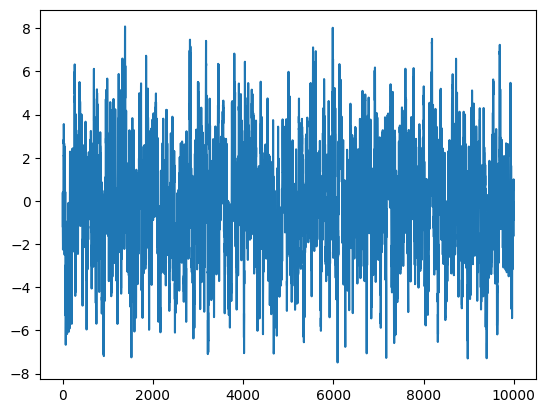

In [4]:
plt.plot(dfAR1['XPrima'][:])

### CTS-DP

### Tensorflow privacy

## SARIMA

In [5]:
# Abrir datos
dfSARIMA = pd.read_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\SARIMA_DATOS.xlsx")


datos = dfSARIMA['XPrima'].to_numpy()
datos = datos.reshape(-1,1)

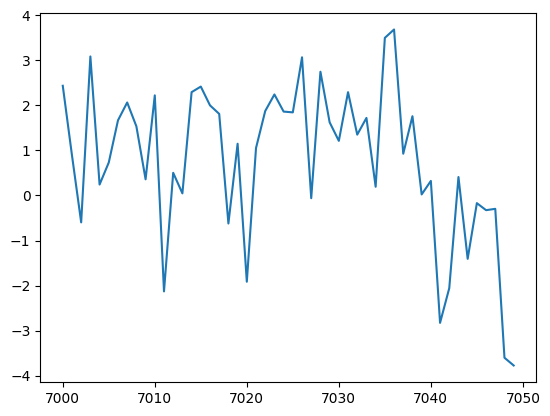

In [13]:
plt.plot(dfSARIMA['XPrima'][7000:7050])

In [37]:
nodos1 = 70
nodos2 = 70
lr = 0.001
paciencia = 5
epocas = 80
batch  = 32
window_size = 168
t_pridiccion = 24
activacion1 = "relu"
activacion2 = "relu"



Epoch 1/80
221/221 [==============================] - 11s 45ms/step - loss: 0.0336 - val_loss: 0.0109
Epoch 2/80
221/221 [==============================] - 10s 47ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 3/80
221/221 [==============================] - 11s 51ms/step - loss: 0.0110 - val_loss: 0.0104
Epoch 4/80
221/221 [==============================] - 11s 50ms/step - loss: 0.0108 - val_loss: 0.0103
Epoch 5/80
221/221 [==============================] - 12s 53ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 6/80
221/221 [==============================] - 12s 53ms/step - loss: 0.0105 - val_loss: 0.0100
Epoch 7/80
221/221 [==============================] - 12s 54ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 8/80
221/221 [==============================] - 12s 55ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 9/80
221/221 [==============================] - 12s 56ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 10/80
221/221 [==============================] - 12s 56ms/step - loss: 0.010

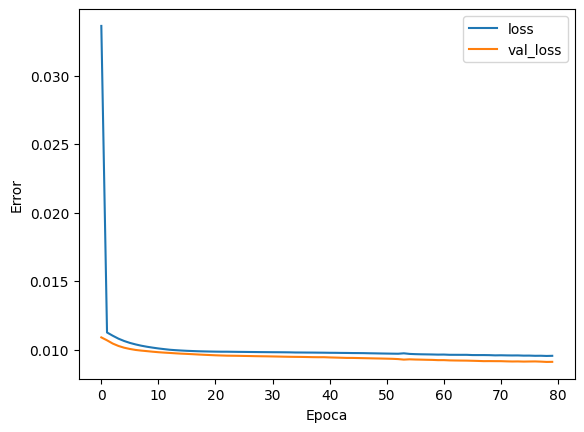

In [38]:
y_test, y_hat =LSTMJD(datos,nodos1,nodos2,activacion1,activacion2,epocas,batch,window_size,paciencia,t_pridiccion)


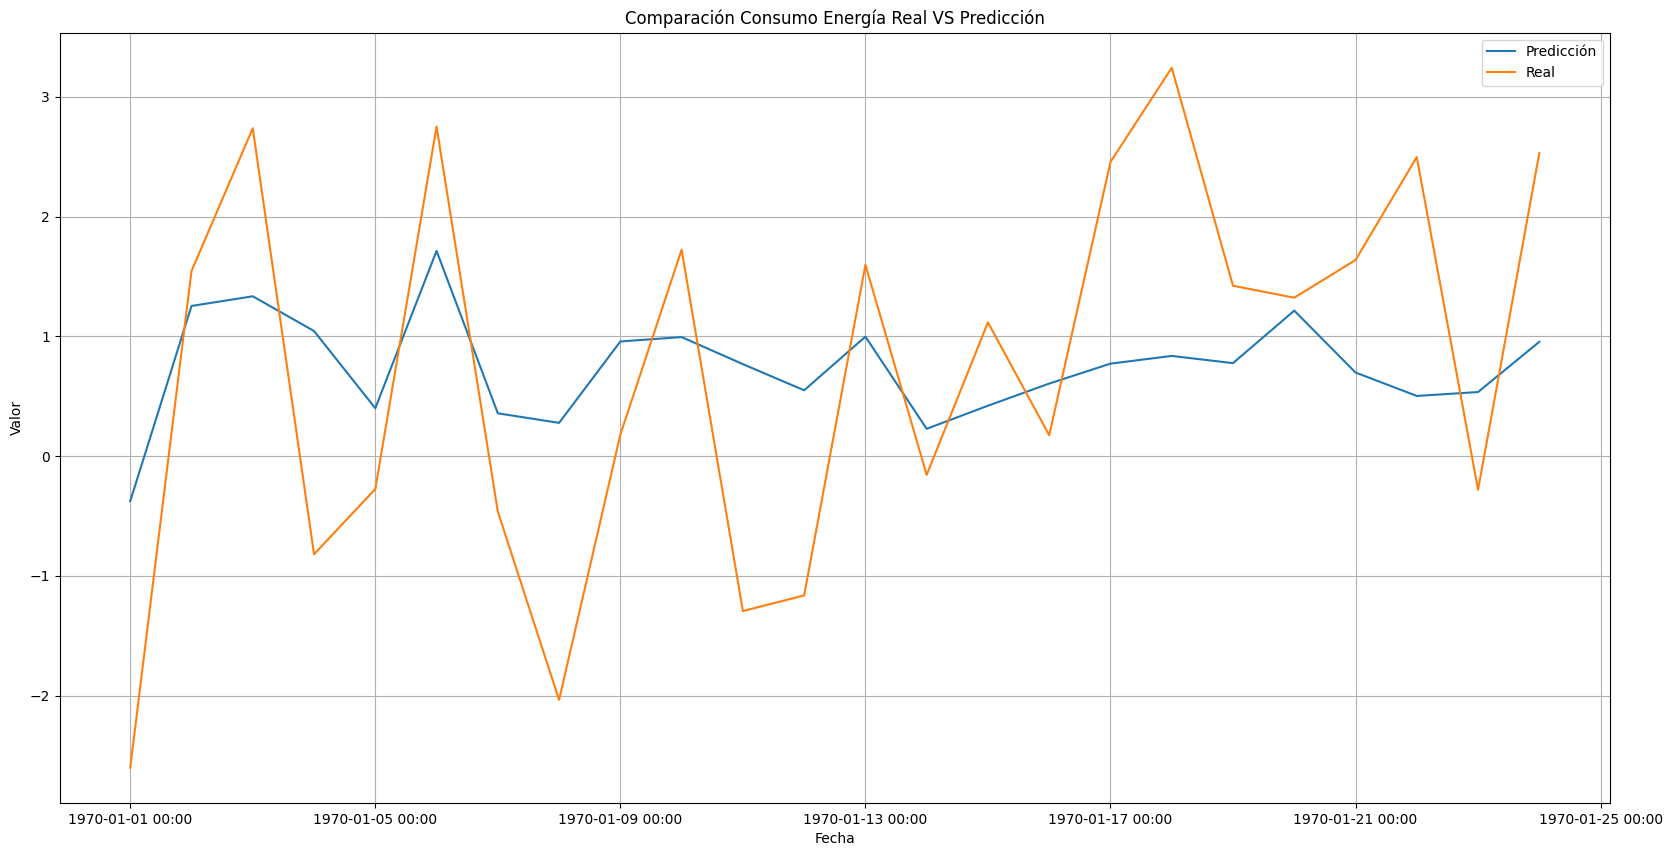

In [27]:

num = 100
plt.figure(figsize=(20,10))
plt.title("Comparación Consumo Energía Real VS Predicción")
#plt.plot(fecha_y_test[num], estandarizacion.inverse_transform(y_test[num]),label = "Real")
plt.plot(y_hat[num],label = "Predicción")
plt.plot(y_test[num],label = "Real")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())



plt.ylabel("Valor")
plt.xlabel("Fecha")
plt.grid()
plt.legend()
plt.show()

###  Encontrar métricas

In [36]:
predicciones24 = []
reales24 = []
for i in range(t_pridiccion):
        
    pred = []
    for Predicciones in y_hat:
        pred.append(Predicciones[i])
        
    real = []
    for reales in y_test:
        real.append(reales[i])
        
    predicciones24.append(pred)
    reales24.append(real)
    



MAES = {}
RMSE = {}
ER_Medios = {}
ER_Medianos = {}
epsilon = 1e-10
for i in range(t_pridiccion):
    MAE = round(mean_absolute_error(predicciones24[i],reales24[i]),2)
    MSE = round(mean_squared_error(reales24[0],predicciones24[i]),2)
    Error_Relativo_Medio = round((np.mean(np.abs((np.array(reales24[i]) - np.array(predicciones24[i])) / (np.array(reales24[i])+epsilon)))*100),2)
    Error_Relativo_Mediano = round((np.median(np.abs((np.array(reales24[i]) - np.array(predicciones24[i])) / (np.array(reales24[i])+epsilon)))*100),2)
    
    
    MAES[i] = MAE
    RMSE[i] = np.sqrt(MSE)
    ER_Medianos[i] = Error_Relativo_Mediano
    ER_Medios[i] = Error_Relativo_Medio

In [33]:
RMSE

{0: 1.4,
 1: 1.7291616465790582,
 2: 1.9924858845171276,
 3: 1.7378147196982767,
 4: 1.5132745950421556,
 5: 1.8303005217723127,
 6: 1.8193405398660252,
 7: 1.5066519173319364,
 8: 1.70293863659264,
 9: 1.797220075561143,
 10: 1.697056274847714,
 11: 1.6,
 12: 1.7146428199482247,
 13: 1.746424919657298,
 14: 1.6093476939431082,
 15: 1.7175564037317668,
 16: 1.7776388834631178,
 17: 1.7492855684535902,
 18: 1.740689518552921,
 19: 1.8275666882497066,
 20: 1.841195263952197,
 21: 1.7262676501632068,
 22: 1.8027756377319946,
 23: 1.8788294228055935}

In [35]:
MAES

{0: 1.11,
 1: 1.11,
 2: 1.16,
 3: 1.36,
 4: 1.34,
 5: 1.33,
 6: 1.31,
 7: 1.48,
 8: 1.49,
 9: 1.53,
 10: 1.66,
 11: 1.67,
 12: 1.72,
 13: 1.73,
 14: 1.79,
 15: 1.83,
 16: 1.89,
 17: 1.95,
 18: 2.0,
 19: 2.04,
 20: 2.07,
 21: 2.11,
 22: 2.16,
 23: 2.19}

In [31]:
ER_Medianos

{0: 134.04,
 1: 133.14,
 2: 132.26,
 3: 129.87,
 4: 129.66,
 5: 130.09,
 6: 129.86,
 7: 127.69,
 8: 127.63,
 9: 125.82,
 10: 124.71,
 11: 124.42,
 12: 123.65,
 13: 124.06,
 14: 123.54,
 15: 122.24,
 16: 121.91,
 17: 121.3,
 18: 120.72,
 19: 120.33,
 20: 120.59,
 21: 119.74,
 22: 118.69,
 23: 118.5}